In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('../BNB_nue data/big_data_nue_and_mu_scaledVars.csv', index_col=0)
df = df.dropna()
df.head()
len(df)
#len(df[df['isTrueTrack']==0])

20232

In [3]:

variables = ['eps','RSS', 'RSS2', 'pc2Var', 'sliding', 'envelope']


In [4]:
df_cut = df.loc[(df['completeness']>0) & (df['purity']>0) & (df['nHits']>0)]
len(df_cut)
df.head()

,isTrueTrack,pdg,completeness,purity,x,z,length,sliding,eps,pc2Var,nHits,RSS,RSS2,sliding_modified,envelope
0,1,2212,1.000000,0.909091,[ 1.72973108 1.64524386 1.51650143 1.431008...,[-1.69030851 -1.60579308 -1.52127766 -1.436762...,4.785806,0.005515,0.133,0.000208,41,0.015505,0.000631,0.005525,9.579459
1,1,2212,0.733333,1.000000,[-1.47290088 -1.33730089 -1.09586675 -0.834588...,[ -1.60356745e+00 -1.33630621e+00 -1.0690449...,4.449725,0.001786,0.365,0.000672,13,0.027864,0.001706,0.005464,8.916642
2,0,11,0.892892,0.998911,[ 1.64560692e+00 1.63333809e+00 1.6140146...,[ -1.81425037e+00 -1.79745365e+00 -1.7806569...,7.127999,0.157412,1.486,0.039021,247,0.227368,0.149946,0.111450,15.046738
3,1,2212,0.989362,0.965398,[-1.36891817 -1.37278191 -1.37222995 -1.380509...,[-1.59732439 -1.57583289 -1.55434138 -1.532849...,4.540850,0.004279,0.385,0.001711,136,0.051166,0.001112,0.004741,9.154247
4,1,2212,0.875000,0.875000,[-1.39488761 -1.32920905 -1.2717403 -1.159539...,[-1.65144565 -1.48630108 -1.32115652 -1.156011...,4.564701,0.003981,0.229,0.002311,21,0.055676,0.002714,0.004950,9.176259


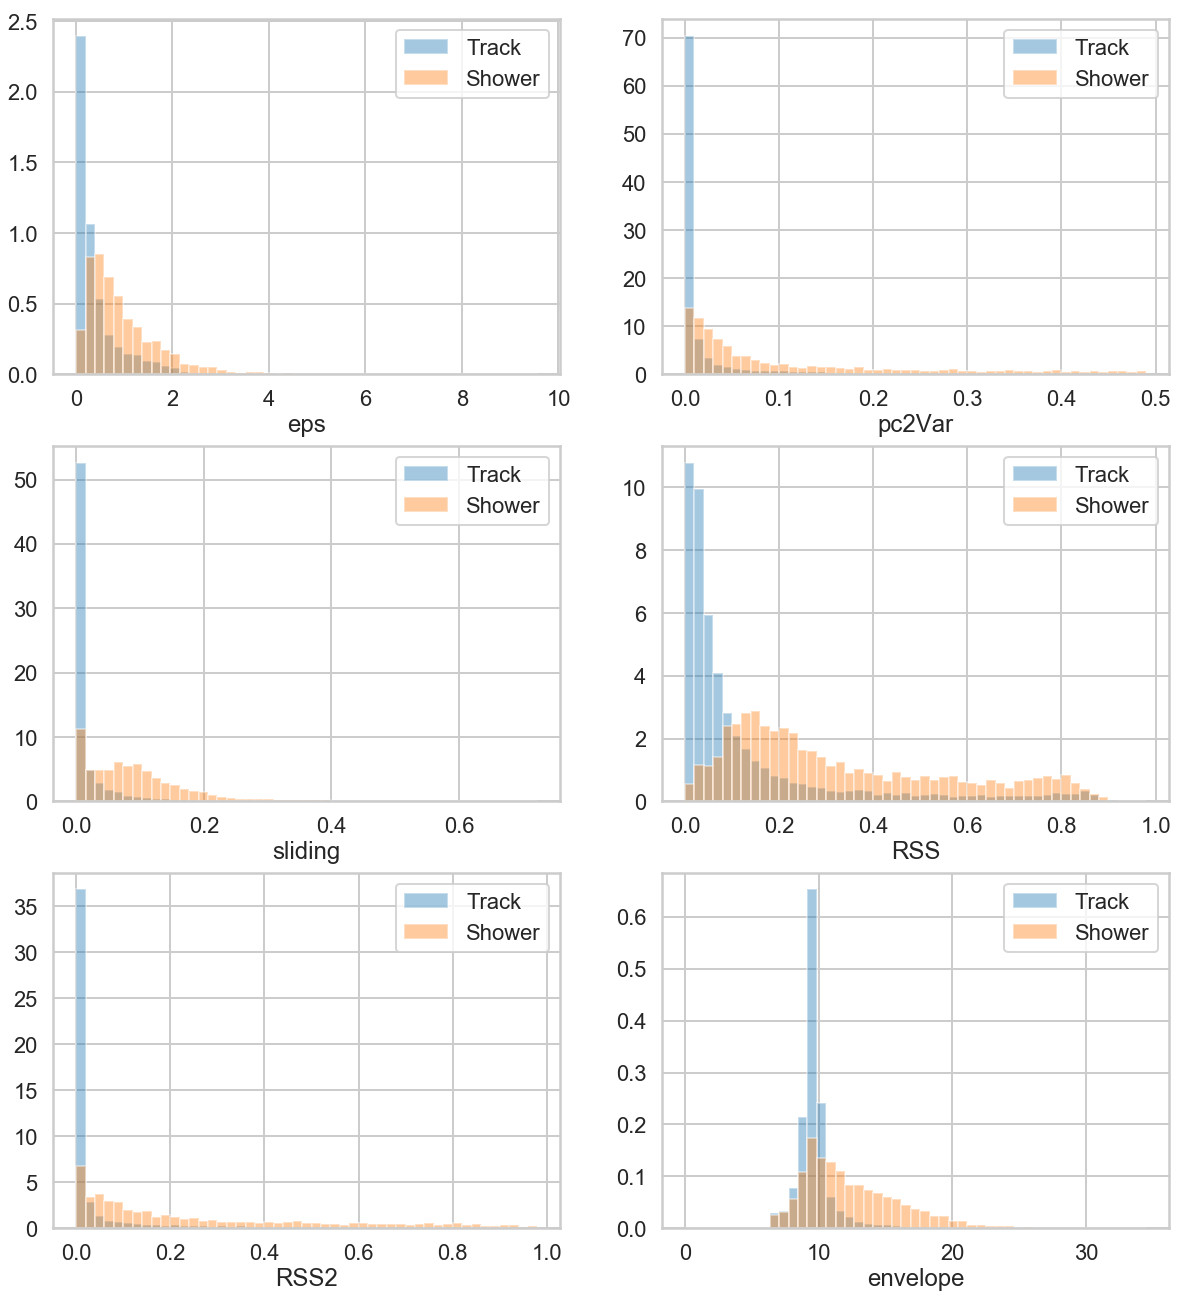

In [17]:
sns.set_style('whitegrid')
sns.set_context("poster")
length=3
width=2
fig, axarr = plt.subplots(length, width, figsize=(20,10))
plt.gcf().subplots_adjust(bottom=-0.8)
count=0
for i in range(len(variables)):
    bins = np.arange(min(df_cut[variables[i]]), max(df_cut[variables[i]]),(max(df_cut[variables[i]]) - min(df_cut[variables[i]]))/50)
    sns.distplot(df_cut[df_cut.isTrueTrack == 1][variables[i]],bins=bins, label='Track',kde=False, norm_hist=True, ax=axarr[i%length][count%width])
    sns.distplot(df_cut[df_cut.isTrueTrack == 0][variables[i]], bins= bins, label = 'Shower', kde=False, norm_hist=True, ax=axarr[i%length][count%width])
    plt.legend()
    axarr[i%length][count%width].legend()
    #axarr[i%length][count%width].set_yscale('log')
    #axarr[i%length][count%width].set_xscale('log')
    count+=1
    plt.close()
    #plt.show()
    
fig

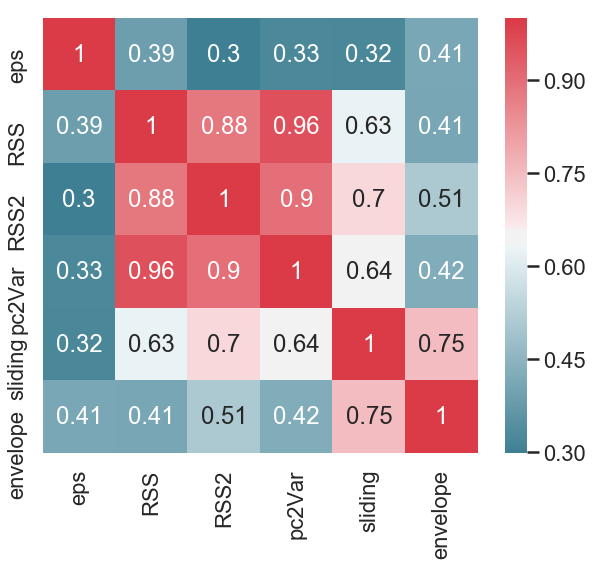

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_cut[variables].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = corr)
plt.show()

In [7]:
df.head()

,isTrueTrack,pdg,completeness,purity,x,z,length,sliding,eps,pc2Var,nHits,RSS,RSS2,sliding_modified,envelope
0,1,2212,1.000000,0.909091,[ 1.72973108 1.64524386 1.51650143 1.431008...,[-1.69030851 -1.60579308 -1.52127766 -1.436762...,4.785806,0.005515,0.133,0.000208,41,0.015505,0.000631,0.005525,9.579459
1,1,2212,0.733333,1.000000,[-1.47290088 -1.33730089 -1.09586675 -0.834588...,[ -1.60356745e+00 -1.33630621e+00 -1.0690449...,4.449725,0.001786,0.365,0.000672,13,0.027864,0.001706,0.005464,8.916642
2,0,11,0.892892,0.998911,[ 1.64560692e+00 1.63333809e+00 1.6140146...,[ -1.81425037e+00 -1.79745365e+00 -1.7806569...,7.127999,0.157412,1.486,0.039021,247,0.227368,0.149946,0.111450,15.046738
3,1,2212,0.989362,0.965398,[-1.36891817 -1.37278191 -1.37222995 -1.380509...,[-1.59732439 -1.57583289 -1.55434138 -1.532849...,4.540850,0.004279,0.385,0.001711,136,0.051166,0.001112,0.004741,9.154247
4,1,2212,0.875000,0.875000,[-1.39488761 -1.32920905 -1.2717403 -1.159539...,[-1.65144565 -1.48630108 -1.32115652 -1.156011...,4.564701,0.003981,0.229,0.002311,21,0.055676,0.002714,0.004950,9.176259


In [8]:
train_variables = variables + ['nHits']
X_train, X_test, y_train, y_test = train_test_split(df_cut[train_variables], df_cut['isTrueTrack'], test_size=0.5, random_state=42)

In [9]:
clf=DecisionTreeClassifier(max_depth=6)
#clf = GradientBoostingClassifier()
clf = clf.fit(X_train, y_train )
y_pred = clf.predict(X_test)
prob = [clf.predict_proba(X_test)[i][1] for i in range(len(X_test))]


confusion_matrix(y_test, y_pred), clf.feature_importances_, train_variables, accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)  

(array([[1158,  776],
        [ 534, 7648]], dtype=int64),
 array([ 0.15906561,  0.02057795,  0.01107044,  0.0147153 ,  0.66767062,
         0.03242997,  0.09447012]),
 ['eps', 'RSS', 'RSS2', 'pc2Var', 'sliding', 'envelope', 'nHits'],
 0.87050217477263736,
 0.9211128507768277)

In [10]:
X_test['prob']=prob
X_test['pred']=y_pred
X_test['isTrueTrack']=y_test

In [11]:
X_test.head()

,eps,RSS,RSS2,pc2Var,sliding,envelope,nHits,prob,pred,isTrueTrack
19816,0.715,0.223951,0.141756,0.043021,0.017688,9.602936,46,0.630178,1,1
12712,0.025,0.029969,0.000205,0.000672,0.002678,9.827008,234,1.000000,1,1
14657,0.904,0.169821,0.123205,0.037710,0.089595,14.468891,90,0.143513,0,1
8923,1.756,0.406143,0.099878,0.122295,0.062868,12.352222,39,0.417526,0,0
14600,0.096,0.006684,0.000091,0.000039,0.002117,9.604233,44,0.997050,1,1


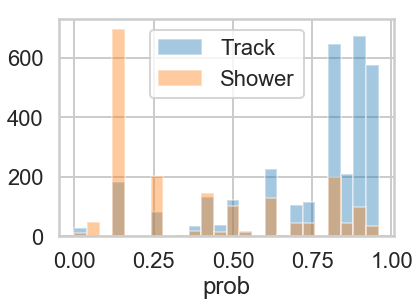

In [24]:
sns.distplot(X_test.loc[X_test['isTrueTrack']==1].prob,label='Track', kde=False, bins= np.arange(0,1,0.04))
sns.distplot(X_test.loc[X_test['isTrueTrack']==0].prob, label='Shower', kde=False, bins= np.arange(0,1,0.04))
plt.legend()
plt.show()

In [51]:
values = np.arange(0,1,0.04)
track_purity=[]
for value in values:
    tp=0
    fp=0
    for j in X_test.index:
        if X_test.prob[j]>value:
            if X_test.isTrueTrack[j]==1:
                tp+= 1
            else:
                fp+=1
    track_purity.append(tp/(tp+fp))

In [52]:
track_completeness=[]
p= sum(X_test.isTrueTrack)
for value in values:
    tp=0
    fp=0
    for j in X_test.index:
        if X_test.prob[j]>value:
            if X_test.isTrueTrack[j]==1:
                tp+= 1
    track_completeness.append(tp/p)

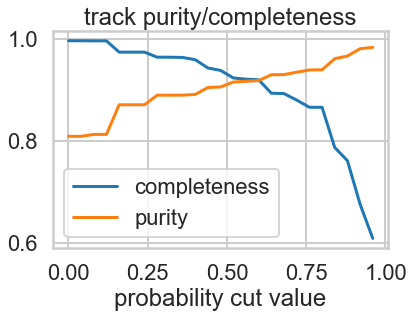

In [53]:
plt.plot(values, track_completeness, label = 'completeness' )
plt.plot(values, track_purity, label = 'purity')
plt.legend(loc = 'best')
plt.title('track purity/completeness')
plt.xlabel('probability cut value')
plt.show()